## Capstone Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('expected_ctc.csv')

### EDA

In [3]:
df.head()

IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0             NaN                NaN        NaN          NaN              NaN   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J              NaN   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education  ... Curent_Location Preferred_location  Current_CTC  \
0         PG  ...        Guwahati               Pune            0   
1  Doctorate  ...       Bangalore             Nagpur      2702664   
2  Doctorate  ...       Ahmedabad             Jaipur      2236661   
3  Doctorate  ...          Kanpur            Kolkata      2100510   
4       Grad  ...       Ahmedabad          Ahmedabad      1931644   

  Inhand_Offer Last_Appraisal_Rating  No_Of_Companies_worked  \
0            N                   NaN                       0   
1            Y         Key_Performer                       2   
2            Y         Key_Performer                       5   
3            N                     C                       5   
4            N                     C                       2   

  Number_of_Publications Certifications  International_degree_any Expected_CTC  
0                      0              0                         0       384551  
1                      4              0                         0      3783729  
2                      3              0                         0      3131325  
3                      3              0                         0      2608833  
4                      3              0                         0      2221390  

[5 rows x 29 columns]

In [4]:
df.shape

(25000, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [6]:
# Info of all the Numerical columns
df.select_dtypes(include = [np.number]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Passing_Year_Of_Graduation         18820 non-null  float64
 5   Passing_Year_Of_PG                 17308 non-null  float64
 6   Passing_Year_Of_PHD                13119 non-null  float64
 7   Current_CTC                        25000 non-null  int64  
 8   No_Of_Companies_worked             25000 non-null  int64  
 9   Number_of_Publications             25000 non-null  int64  
 10  Certifications                     25000 non-null  int64  
 11  International_degree_any           25000 non-null  int

In [7]:
df.select_dtypes(include = [object]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Department                 22222 non-null  object
 1   Role                       24037 non-null  object
 2   Industry                   24092 non-null  object
 3   Organization               24092 non-null  object
 4   Designation                21871 non-null  object
 5   Education                  25000 non-null  object
 6   Graduation_Specialization  18820 non-null  object
 7   University_Grad            18820 non-null  object
 8   PG_Specialization          17308 non-null  object
 9   University_PG              17308 non-null  object
 10  PHD_Specialization         13119 non-null  object
 11  University_PHD             13119 non-null  object
 12  Curent_Location            25000 non-null  object
 13  Preferred_location         25000 non-null  object
 14  Inhand

In [8]:
df.describe()

IDX  Applicant_ID  Total_Experience  \
count  25000.000000  25000.000000      25000.000000   
mean   12500.500000  34993.240080         12.493080   
std     7217.022701  14390.271591          7.471398   
min        1.000000  10000.000000          0.000000   
25%     6250.750000  22563.750000          6.000000   
50%    12500.500000  34974.500000         12.000000   
75%    18750.250000  47419.000000         19.000000   
max    25000.000000  60000.000000         25.000000   

       Total_Experience_in_field_applied  Passing_Year_Of_Graduation  \
count                       25000.000000                18820.000000   
mean                            6.258200                 2002.193624   
std                             5.819513                    8.316640   
min                             0.000000                 1986.000000   
25%                             1.000000                 1996.000000   
50%                             5.000000                 2002.000000   
75%                            10.000000                 2009.000000   
max                            25.000000                 2020.000000   

       Passing_Year_Of_PG  Passing_Year_Of_PHD   Current_CTC  \
count        17308.000000         13119.000000  2.500000e+04   
mean          2005.153571          2007.396372  1.760945e+06   
std              9.022963             7.493601  9.202125e+05   
min           1988.000000          1995.000000  0.000000e+00   
25%           1997.000000          2001.000000  1.027312e+06   
50%           2006.000000          2007.000000  1.802568e+06   
75%           2012.000000          2014.000000  2.443883e+06   
max           2023.000000          2020.000000  3.999693e+06   

       No_Of_Companies_worked  Number_of_Publications  Certifications  \
count            25000.000000            25000.000000    25000.000000   
mean                 3.482040                4.089040        0.773680   
std                  1.690335                2.606612        1.199449   
min                  0.000000                0.000000        0.000000   
25%                  2.000000                2.000000        0.000000   
50%                  3.000000                4.000000        0.000000   
75%                  5.000000                6.000000        1.000000   
max                  6.000000                8.000000        5.000000   

       International_degree_any  Expected_CTC  
count              25000.000000  2.500000e+04  
mean                   0.081720  2.250155e+06  
std                    0.273943  1.160480e+06  
min                    0.000000  2.037440e+05  
25%                    0.000000  1.306278e+06  
50%                    0.000000  2.252136e+06  
75%                    0.000000  3.051354e+06  
max                    1.000000  5.599570e+06

In [9]:
# Check for duplicates rows

dups = df.duplicated().sum()
print(f"Number of duplicated rows: {dups}")

Number of duplicated rows: 0


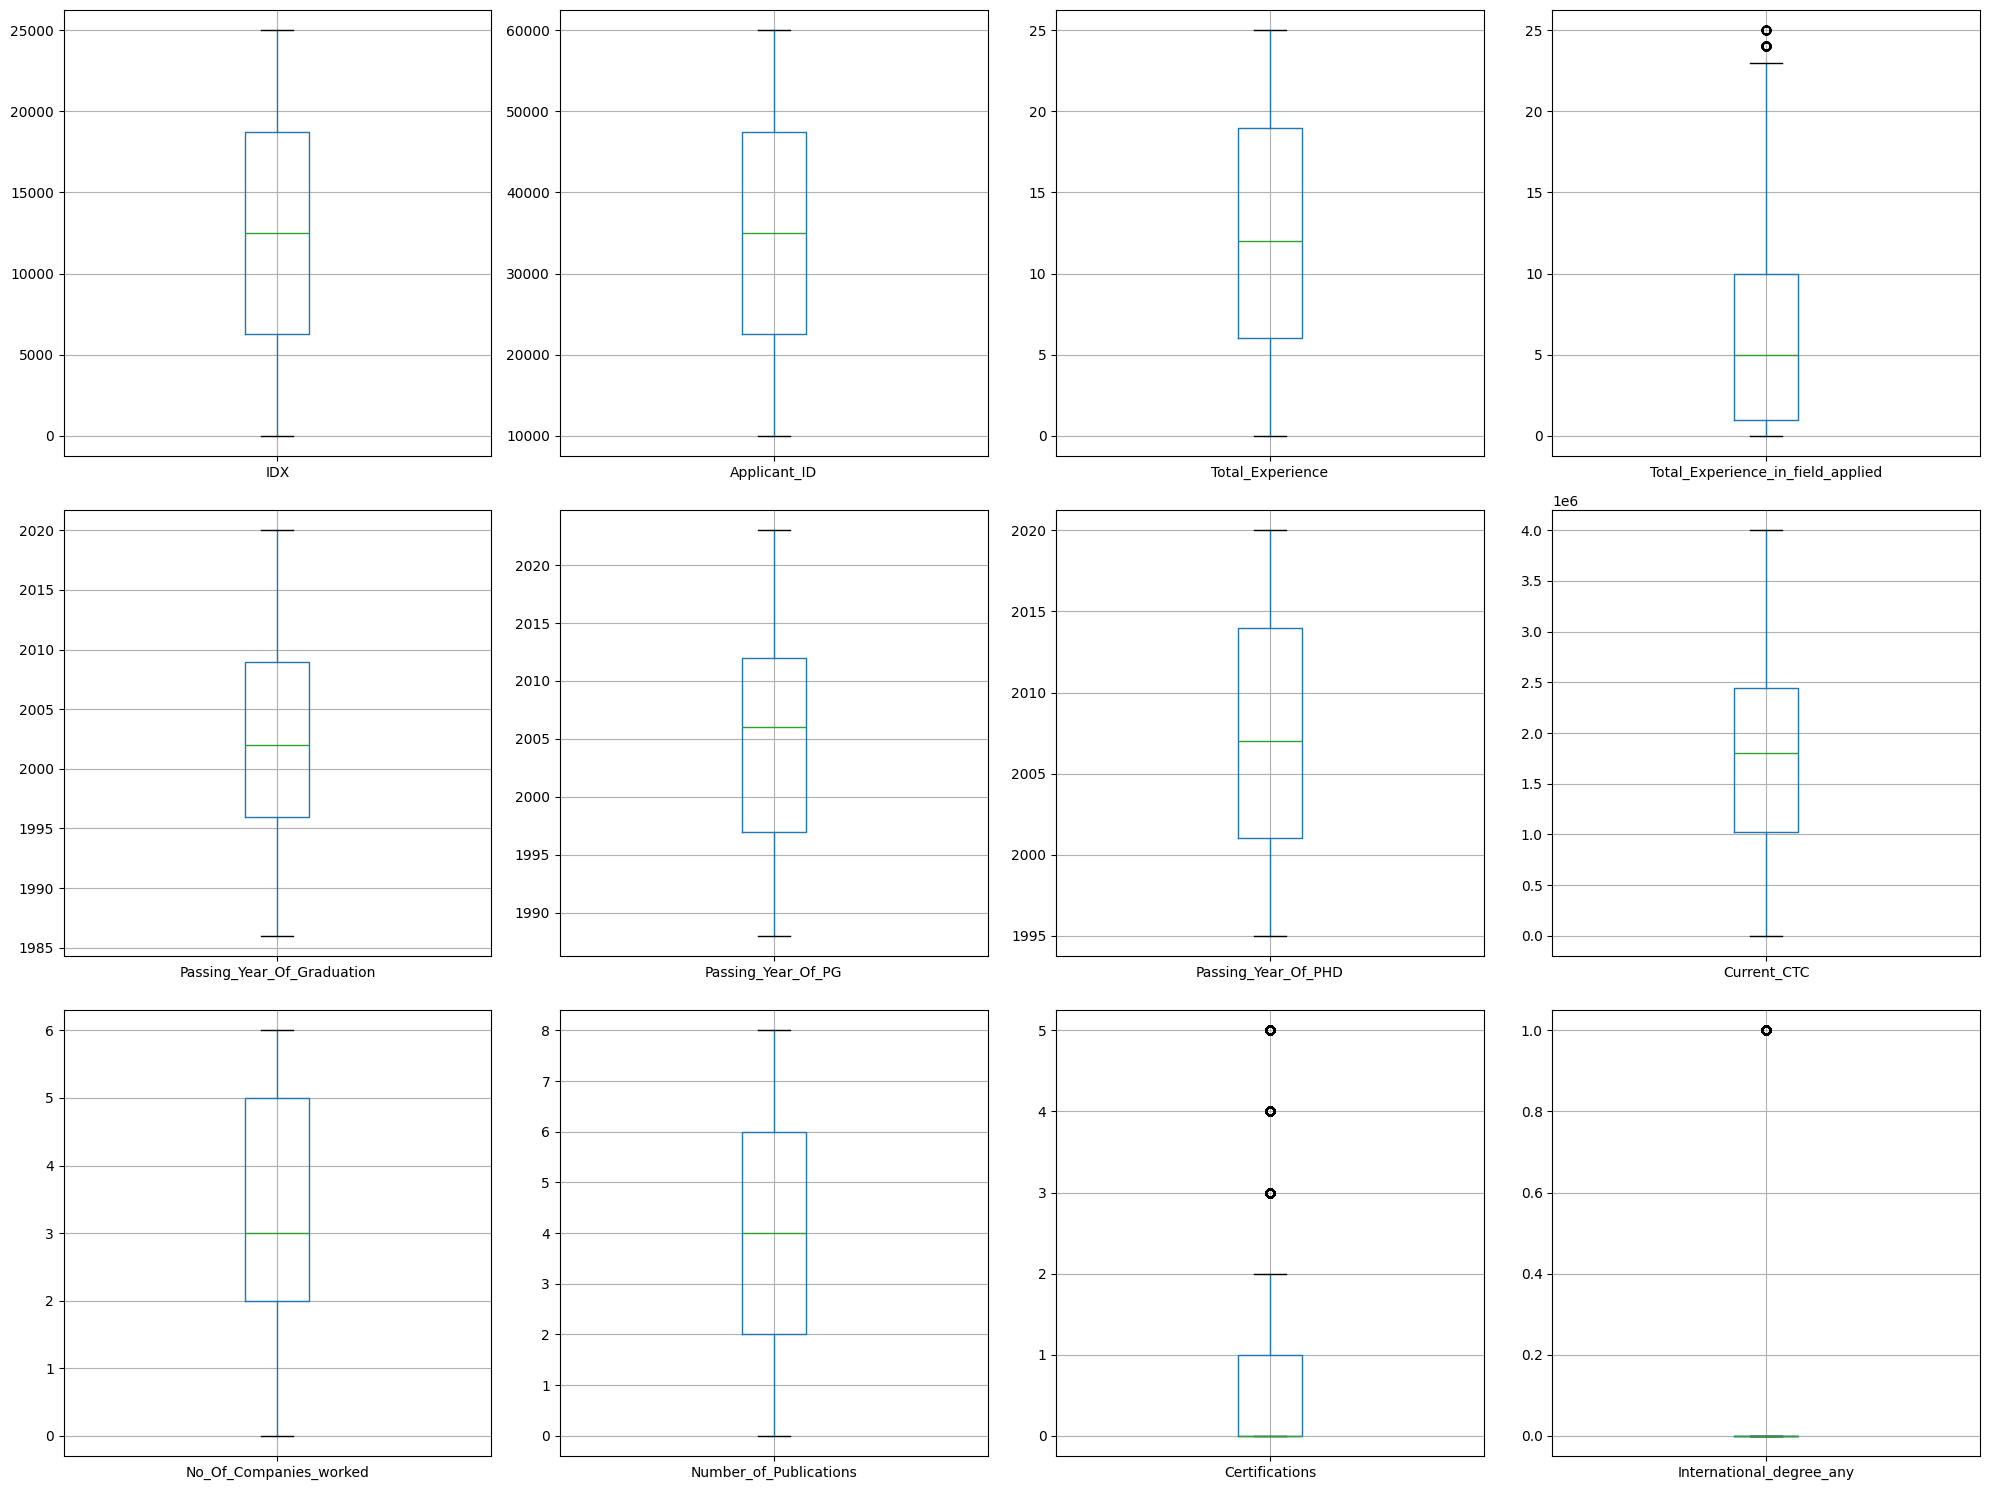

In [10]:
# Check for outliers using box plots

numerical_cols = df.select_dtypes(include = [np.number]).columns.tolist()

fig, axes = plt.subplots(3, 4, figsize = (20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:12]):
    df.boxplot(column = col, ax = axes[i])

plt.tight_layout()
plt.show()


In [11]:
# Capping outliers using IQR method

def remove_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

for col in numerical_cols:
    lr, ur = remove_outliers(df[col])
    df[col] = np.where(df[col] < lr, lr, np.where(df[col] > ur, ur, df[col]))

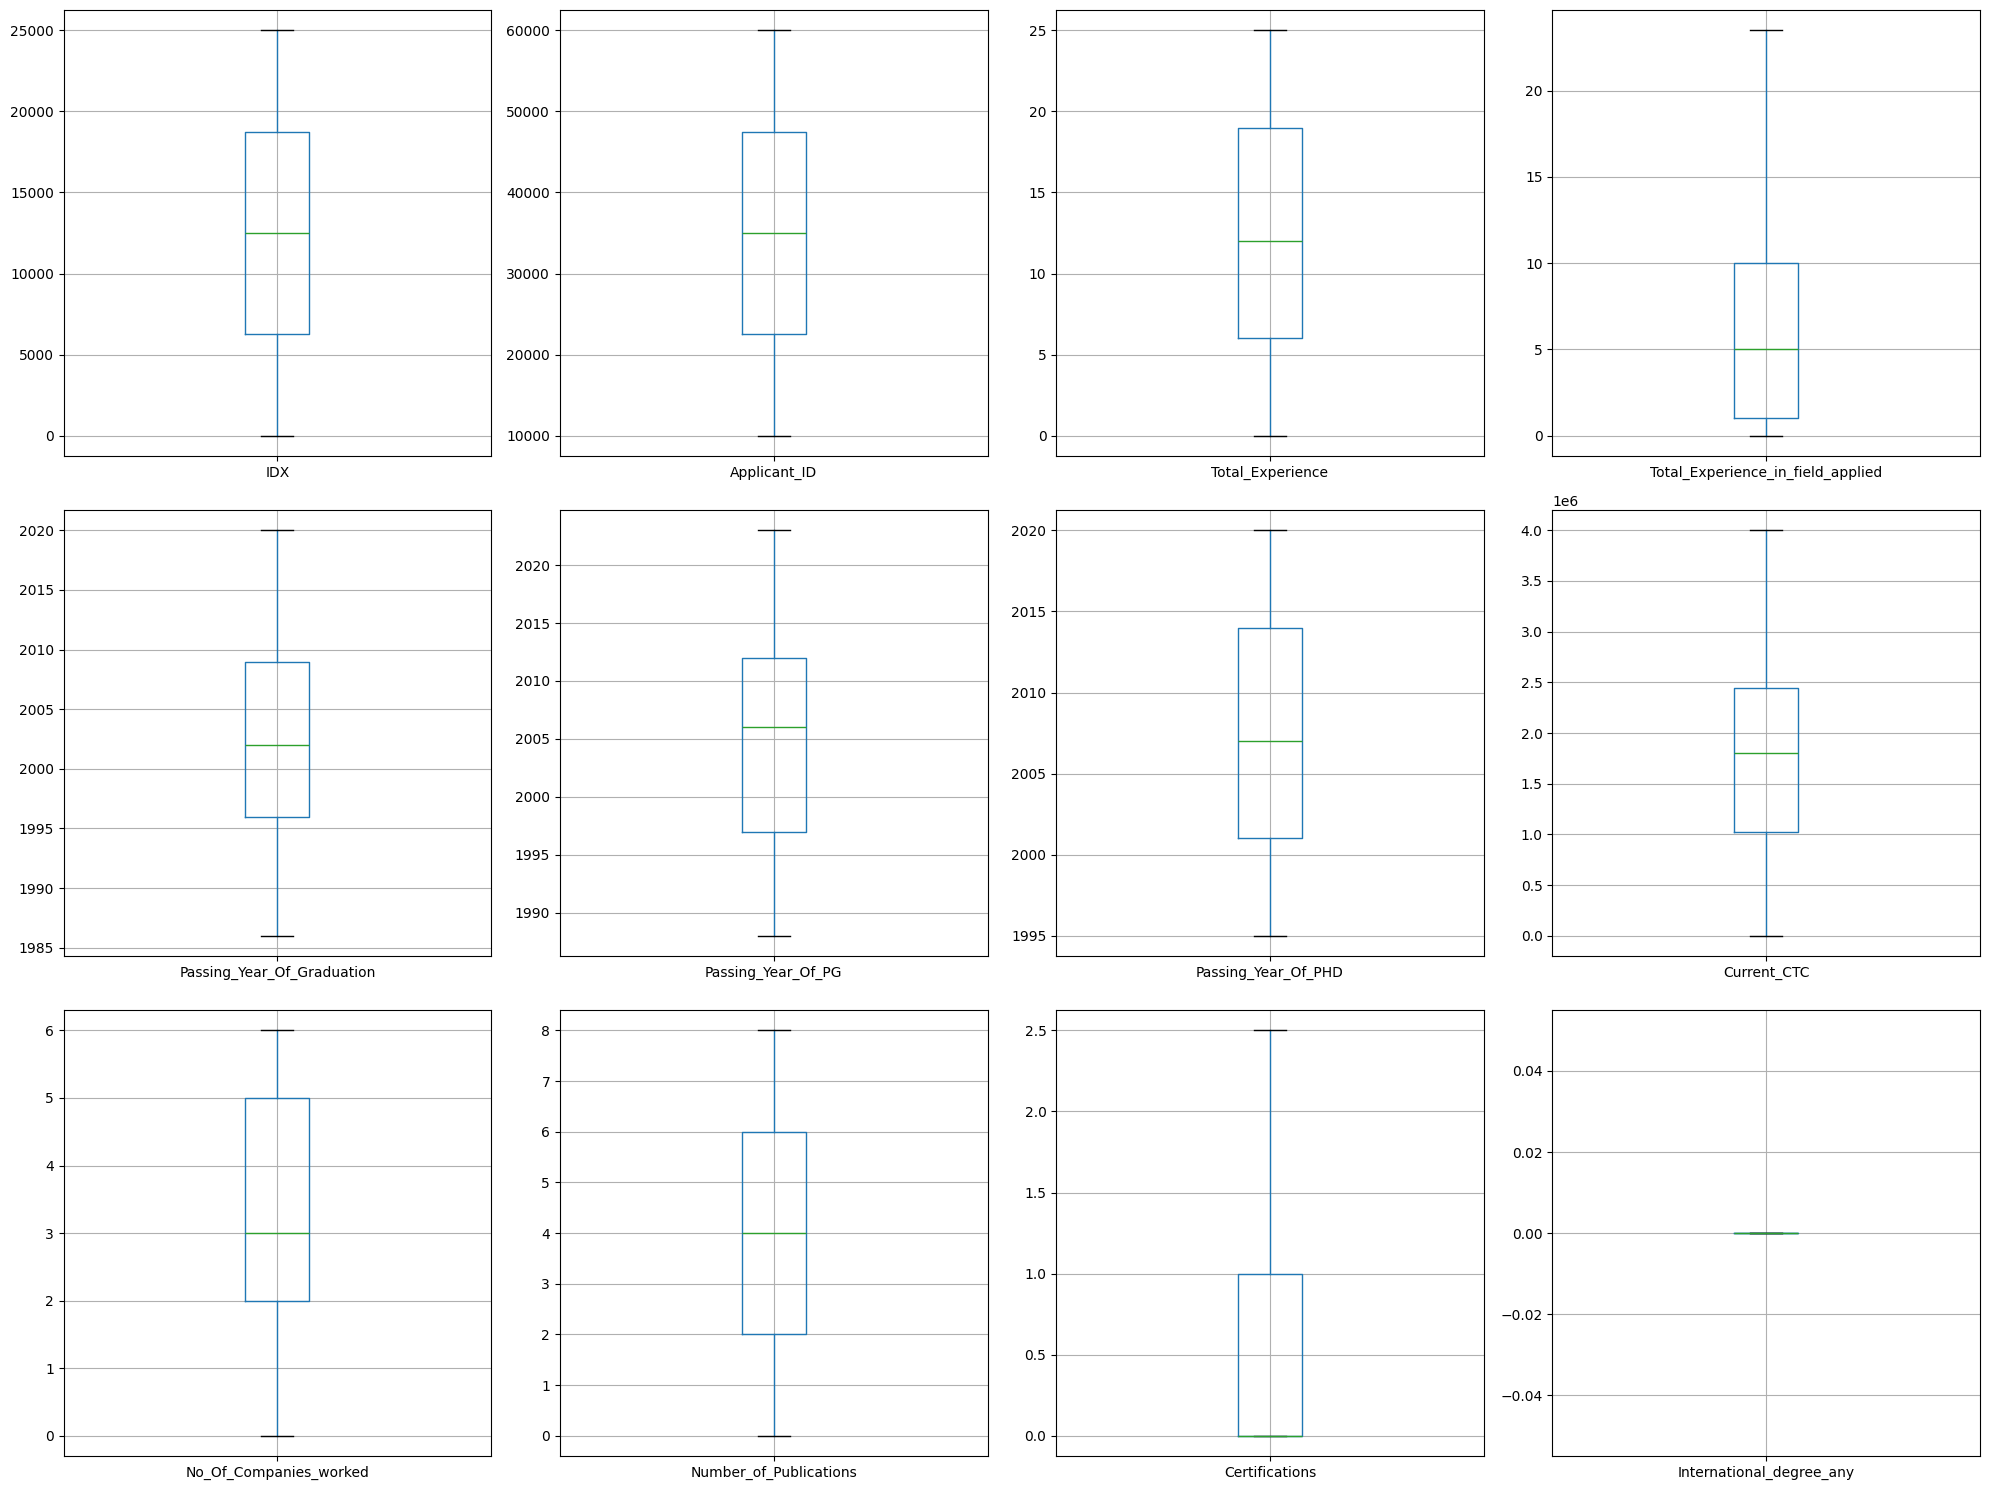

In [12]:
# Check box plots again after removing outliers

fig, axes = plt.subplots(3, 4, figsize = (20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:12]):
    df.boxplot(column = col, ax = axes[i])

plt.tight_layout()
plt.show()

In [13]:
# Check for null values

df.isnull().sum()

IDX                                      0
Applicant_ID                             0
Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Apprai

In [14]:
# Check null columns percentage

df.isnull().mean() * 100

IDX                                   0.000
Applicant_ID                          0.000
Total_Experience                      0.000
Total_Experience_in_field_applied     0.000
Department                           11.112
Role                                  3.852
Industry                              3.632
Organization                          3.632
Designation                          12.516
Education                             0.000
Graduation_Specialization            24.720
University_Grad                      24.720
Passing_Year_Of_Graduation           24.720
PG_Specialization                    30.768
University_PG                        30.768
Passing_Year_Of_PG                   30.768
PHD_Specialization                   47.524
University_PHD                       47.524
Passing_Year_Of_PHD                  47.524
Curent_Location                       0.000
Preferred_location                    0.000
Current_CTC                           0.000
Inhand_Offer                    

In [15]:
# Check the data types of all the null value columns

null_cols = df.columns[df.isnull().any()].tolist()
df[null_cols].dtypes

Department                     object
Role                           object
Industry                       object
Organization                   object
Designation                    object
Graduation_Specialization      object
University_Grad                object
Passing_Year_Of_Graduation    float64
PG_Specialization              object
University_PG                  object
Passing_Year_Of_PG            float64
PHD_Specialization             object
University_PHD                 object
Passing_Year_Of_PHD           float64
Last_Appraisal_Rating          object
dtype: object

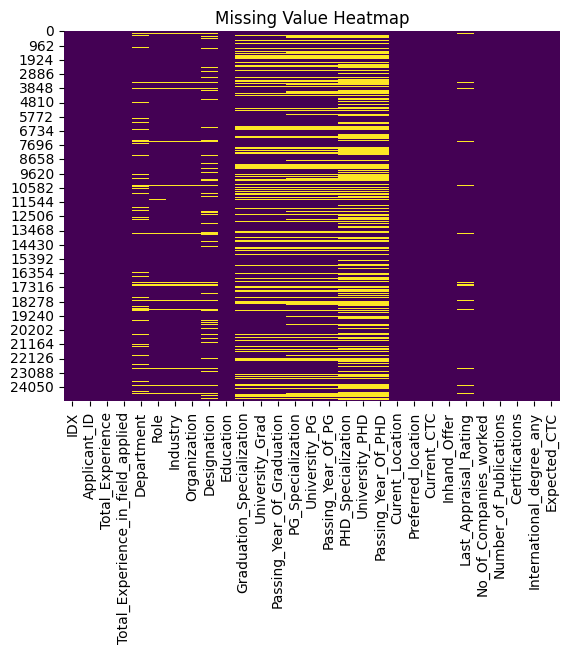

In [16]:
# Visualize missing values using heatmap

sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [17]:
# Replacing null values in numerical columns with medain

numeric_cols = df[null_cols].select_dtypes(include = [np.number]).columns.tolist()
for col in df[numeric_cols]:
    median = df[col].median()
    df[col].fillna(median, inplace = True)

# Replacing null values in categorical columns with mode

categoric_cols = df[null_cols].select_dtypes(include = [object]).columns.tolist()
for col in df[categoric_cols]:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace = True)


In [18]:
# Recheck for null values after imputation

df.isnull().sum()

IDX                                  0
Applicant_ID                         0
Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications   

### Univariate Analysis

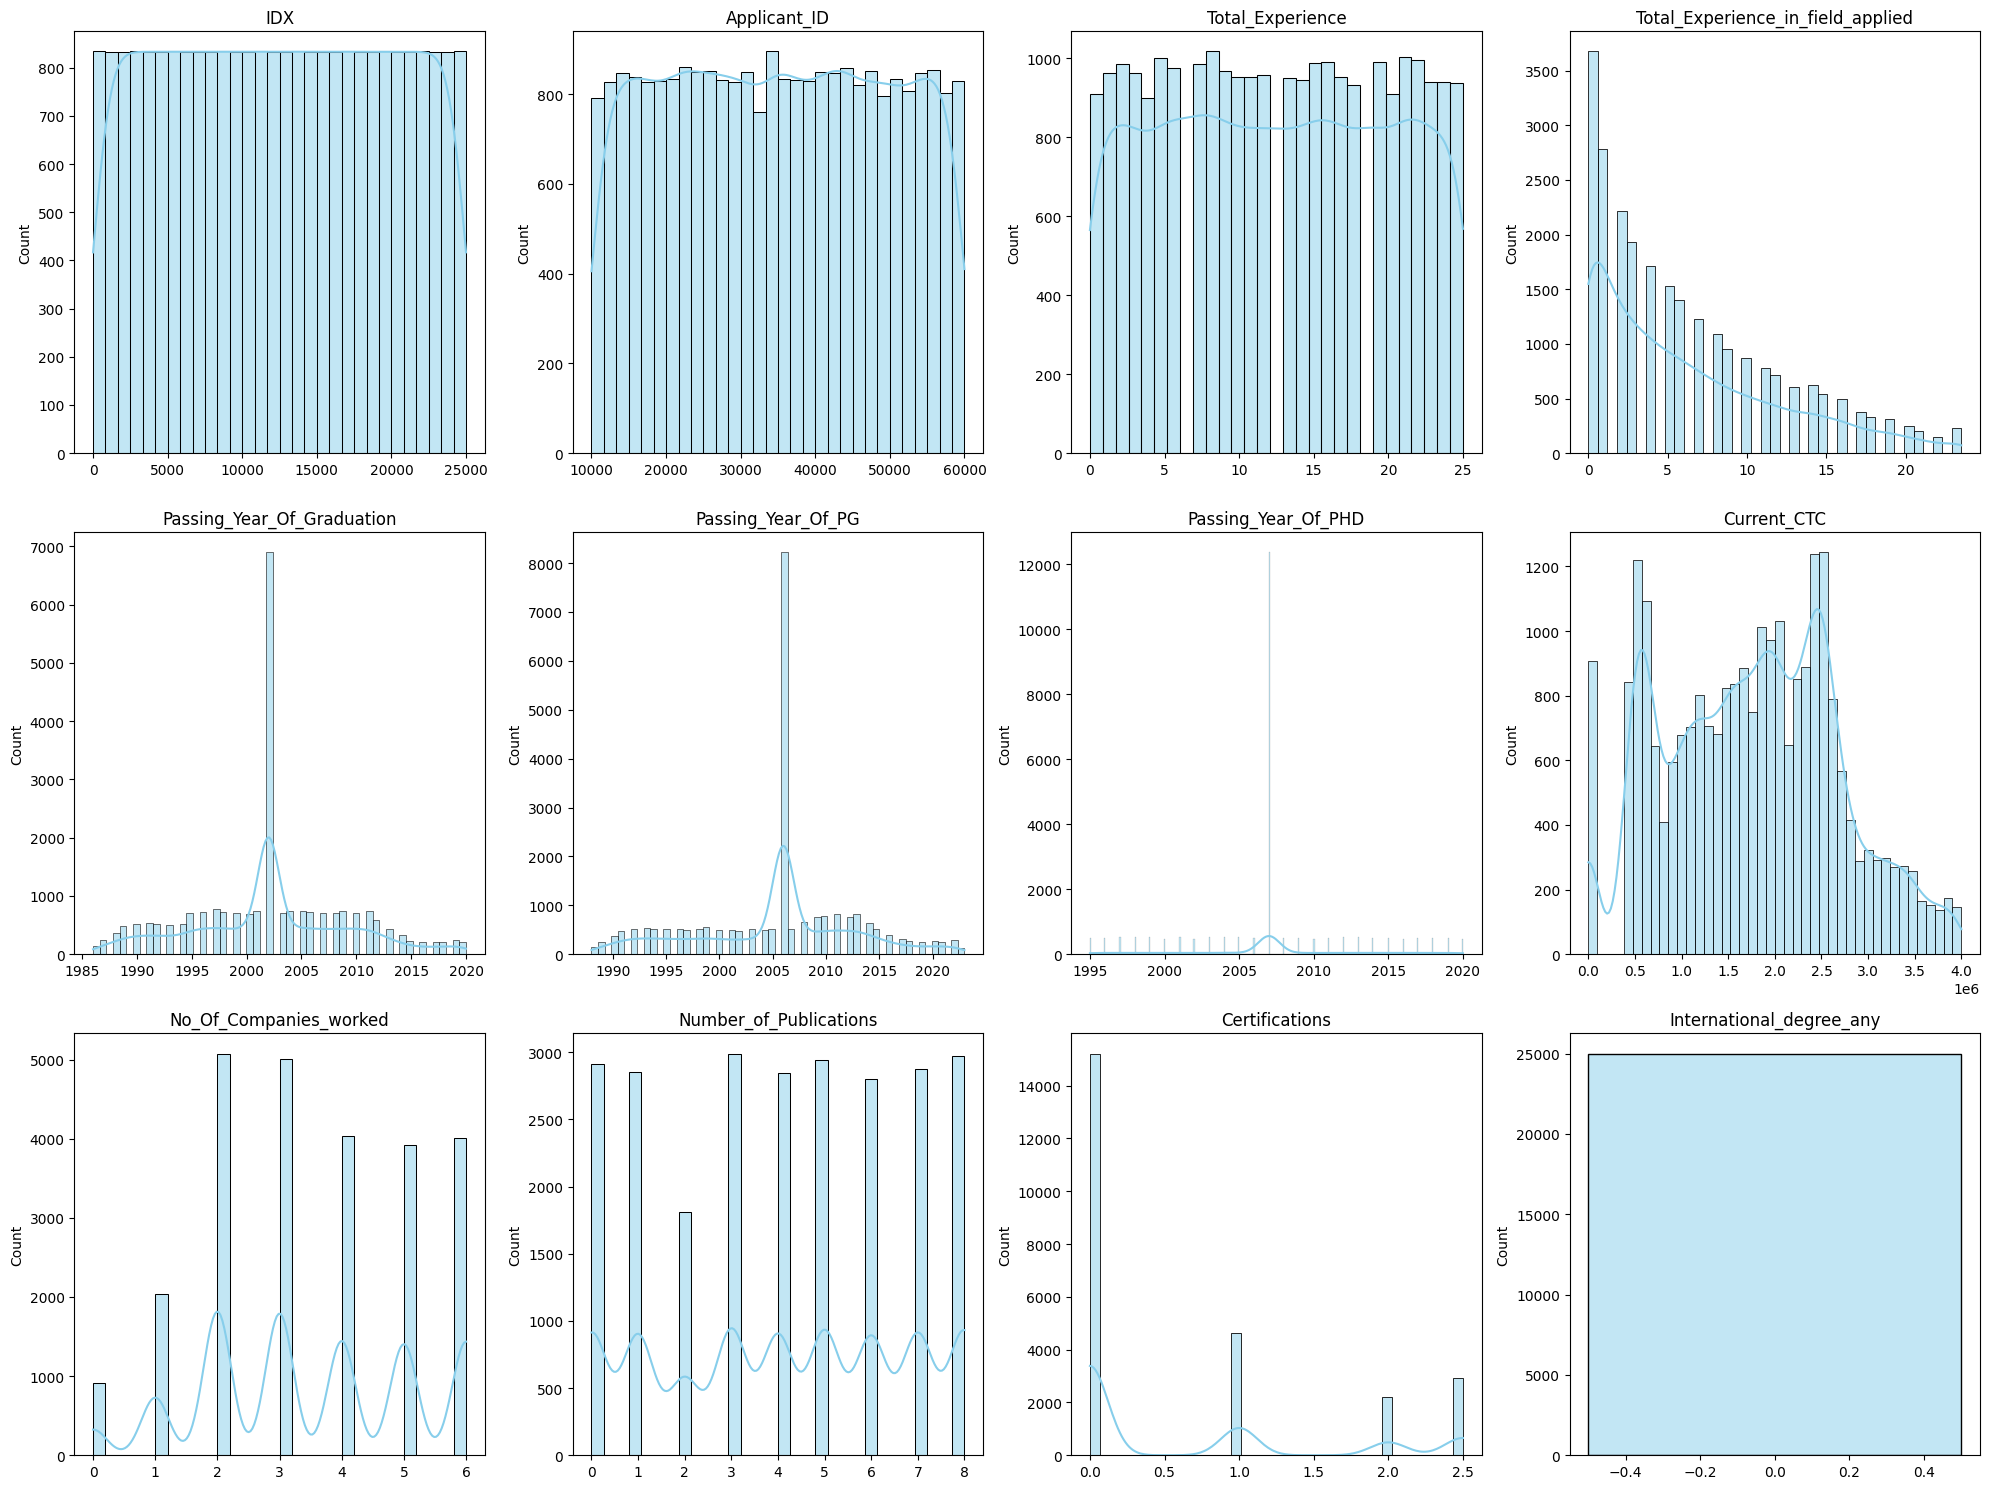

In [19]:
fig, axes = plt.subplots(3, 4, figsize = (20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols[:12]):
    sns.histplot(df[col], kde = True, ax = axes[i], color = 'skyblue')
    axes[i].set_title(col, fontsize = 12)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

### Bivariate Analysis

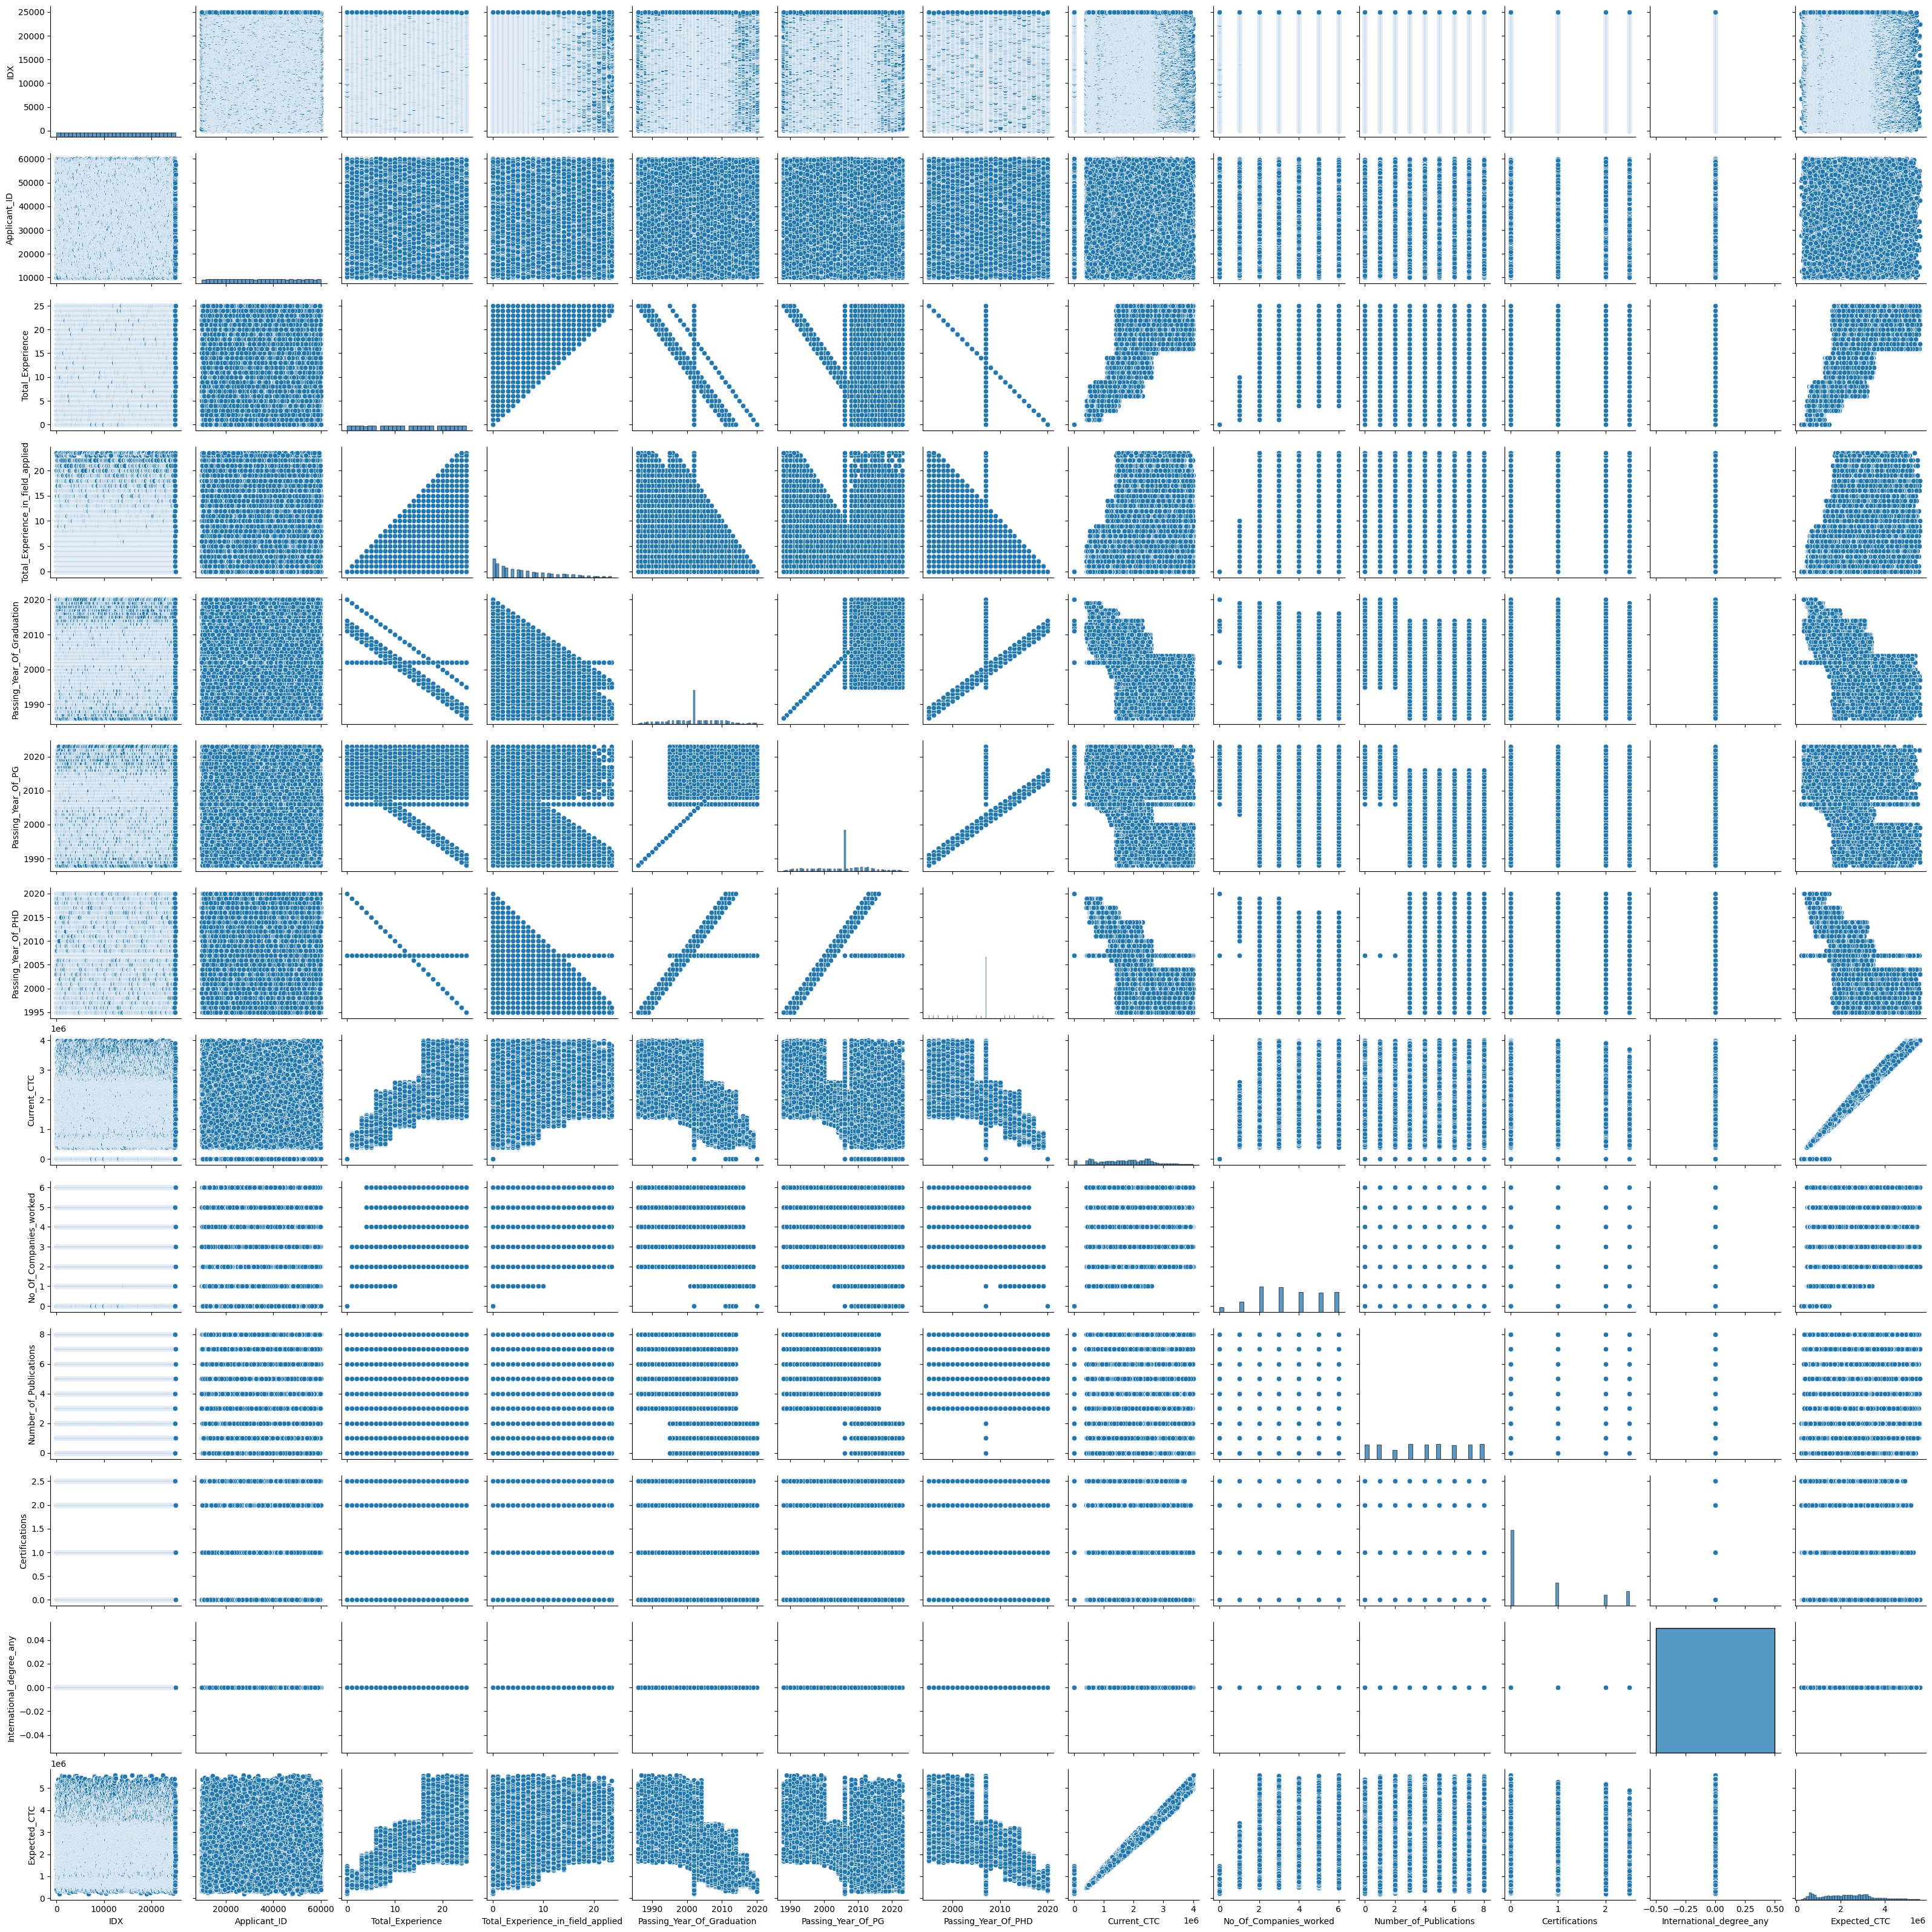

In [20]:
sns.pairplot(df)
plt.show()

### Multivariate Analysis

<Axes: >

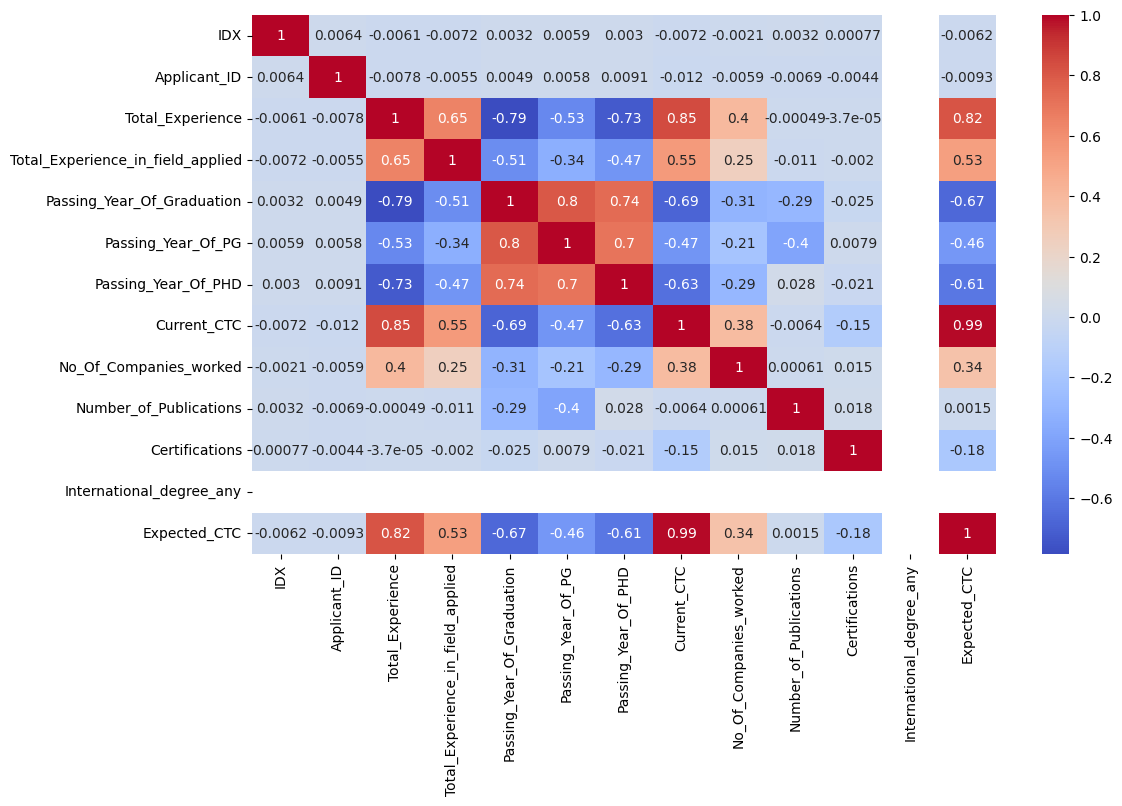

In [21]:
plt.figure(figsize = (12, 7))
sns.heatmap(df[numerical_cols].corr(), annot = True, cmap = 'coolwarm')

In [22]:
# Converting categorical feature to numeriacl features using one hot encoding

category_cols = df.select_dtypes(include = ['object', 'category']).columns.tolist()
df = pd.get_dummies(df, columns = category_cols, drop_first = True).astype(int)

In [23]:
df.head()

IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

   Passing_Year_Of_Graduation  Passing_Year_Of_PG  Passing_Year_Of_PHD  \
0                        2020                2006                 2007   
1                        1988                1990                 1997   
2                        1990                1992                 1999   
3                        1997                1999                 2005   
4                        2004                2006                 2010   

   Current_CTC  No_Of_Companies_worked  Number_of_Publications  ...  \
0            0                       0                       0  ...   
1      2702664                       2                       4  ...   
2      2236661                       5                       3  ...   
3      2100510                       5                       3  ...   
4      1931644                       2                       3  ...   

   Preferred_location_Mangalore  Preferred_location_Mumbai  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Preferred_location_Nagpur  Preferred_location_Pune  \
0                          0                        1   
1                          1                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Preferred_location_Surat  Inhand_Offer_Y  Last_Appraisal_Rating_B  \
0                         0               0                        1   
1                         0               1                        0   
2                         0               1                        0   
3                         0               0                        0   
4                         0               0                        0   

   Last_Appraisal_Rating_C  Last_Appraisal_Rating_D  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        1                        0   
4                        1                        0   

   Last_Appraisal_Rating_Key_Performer  
0                                    0  
1                                    1  
2                                    1  
3                                    0  
4                                    0  

[5 rows x 191 columns]

### Declare Feature variable and target variable

In [24]:
X = df.drop('Expected_CTC', axis = 1)
Y = df['Expected_CTC']

In [25]:
# Splitting data for training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [26]:
# Check the dimensions of Feature and Target variable

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(17500, 190)
(17500,)
(7500, 190)
(7500,)


###  Multiple Linear Regression

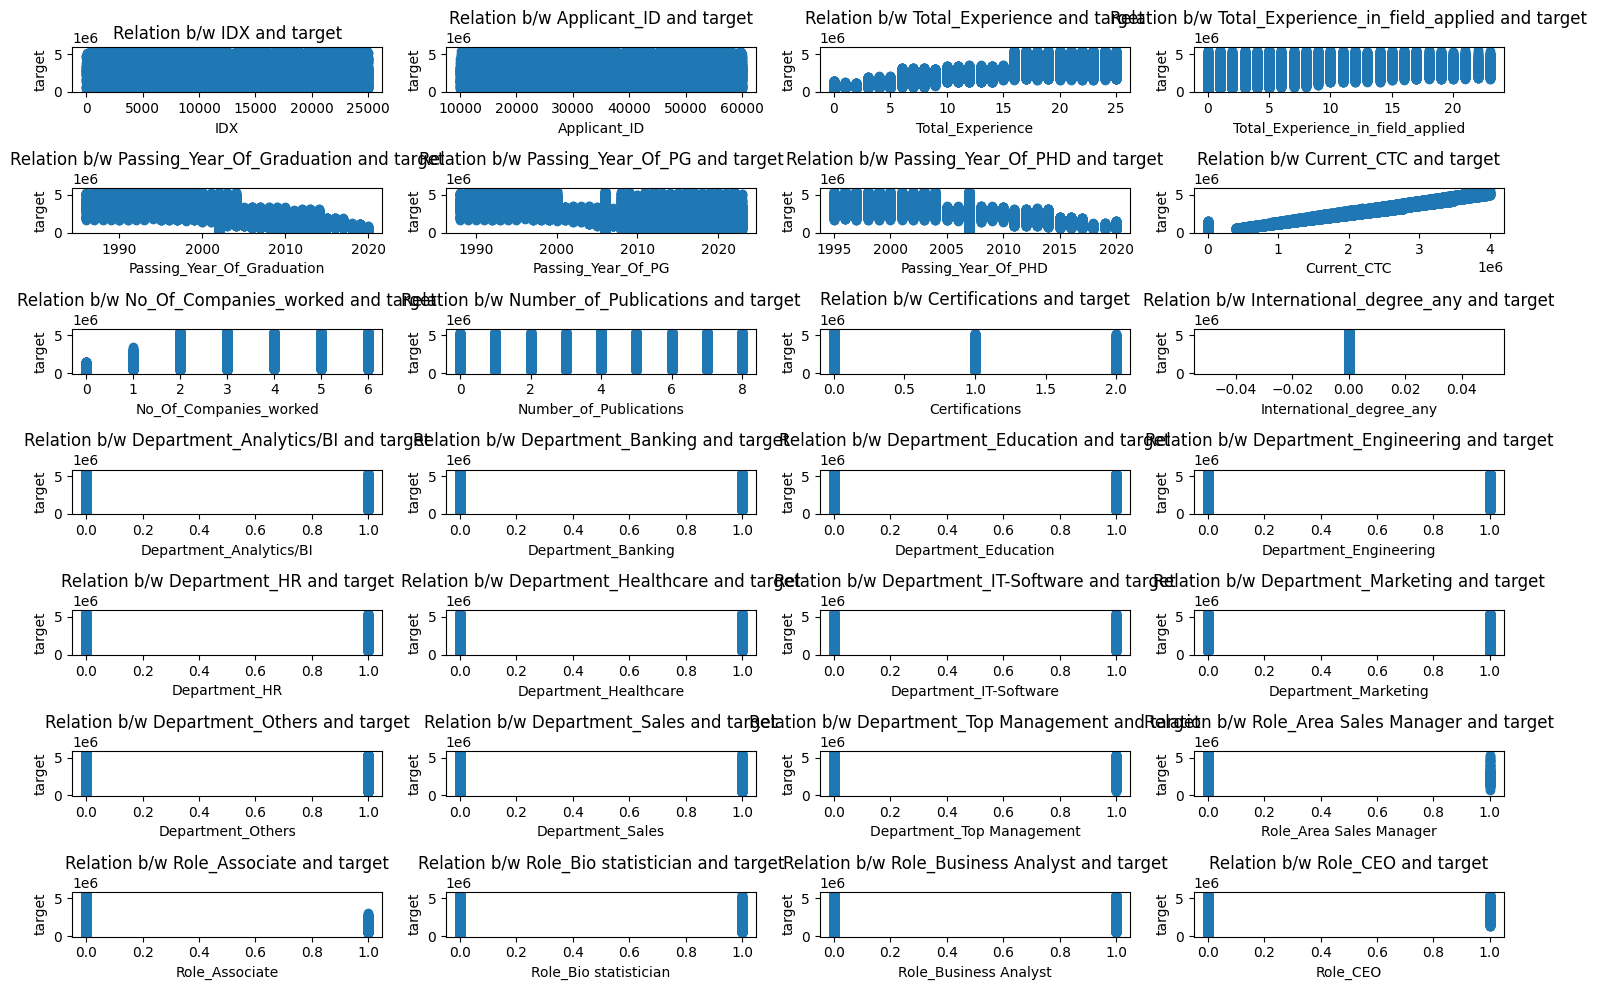

In [27]:
fig, axes = plt.subplots(7, 4, figsize = (15, 10))
axes = axes.flatten()

for i, col in enumerate(X.columns[:28]):
    ax = axes[i]
    ax.scatter(X[col], Y, label = 'Scatter plot')
    ax.set_title(f'Relation b/w {col} and target')
    ax.set_xlabel(col)
    ax.set_ylabel('target')

plt.tight_layout()
plt.show()

In [28]:
# Instigate the Linear Regressor

from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

In [29]:
# Computing the mdoel slope and intercept

m = lm.coef_
c = lm.intercept_

print("Estimated slpoe of model: {}". format(m))
print("Estimated intercept of model: {}". format(c))

Estimated slpoe of model: [ 5.61315046e-02  5.81362953e-02 -2.16010060e+03  5.33435478e+01
 -2.96664269e+03  1.11989849e+03  2.92210815e+02  1.25147090e+00
 -6.76804890e+03  2.93704485e+02 -1.51366988e+03 -3.19570972e-06
  3.93429315e+03  4.50760140e+03  2.33472241e+03  2.60101445e+03
  5.77271580e+03  2.53699967e+03  1.38195489e+03  4.21389314e+04
  2.69141441e+03  5.44277217e+03  3.66161694e+03  1.61414307e+04
 -1.16099730e+04  5.56815431e+03  6.84179440e+02  9.13206504e+03
  5.28545266e+03  1.28503749e+04 -6.84968857e+02  4.86289371e+03
  1.70167859e+04  7.56306391e+04  6.55549276e+03  3.66401029e+04
 -1.41643406e+03  3.04976517e+04  2.13112674e+04  1.49690253e+03
  1.76454319e+03 -1.33427643e+03  1.70794998e+04  6.05561529e+03
  1.43300138e+04  4.18123554e+03 -1.58231449e+03  9.69852611e+02
  2.34690907e+03  1.39605061e+03  3.02711797e+03  2.01279693e+03
  2.40579965e+03  5.39552649e+01  1.40953110e+03  6.63793797e+04
 -2.28800607e+03 -5.48783701e+03 -2.39510377e+03 -2.46547461e+03

In [30]:
# Creating a dataframe that pairs each features with its coefficient(slope)

coeff_df = pd.DataFrame({
    'Features' : X.columns,
    'Coefficient(slope)' : lm.coef_
})

coeff_df.head()

Features  Coefficient(slope)
0                                IDX            0.056132
1                       Applicant_ID            0.058136
2                   Total_Experience        -2160.100600
3  Total_Experience_in_field_applied           53.343548
4         Passing_Year_Of_Graduation        -2966.642688

In [54]:
coeff_df.shape

(190, 3)

In [32]:
# Check the most influential features

coeff_df['abs_coeff'] = coeff_df['Coefficient(slope)'].abs()
impo_features = coeff_df.sort_values(by = 'abs_coeff', ascending = False)

top_features = impo_features.head(10)

top_features

Features  Coefficient(slope)      abs_coeff
88                   Education_Grad      -215708.782360  215708.782360
188         Last_Appraisal_Rating_D      -206791.263117  206791.263117
187         Last_Appraisal_Rating_C      -205793.179255  205793.179255
90             Education_Under Grad      -195510.395829  195510.395829
89                     Education_PG      -131383.083111  131383.083111
67                   Organization_M        92760.684328   92760.684328
33                      Role_Others        75630.639145   75630.639145
55                Industry_Training        66379.379723   66379.379723
185                  Inhand_Offer_Y        53353.792126   53353.792126
139  PHD_Specialization_Mathematics        50821.589120   50821.589120

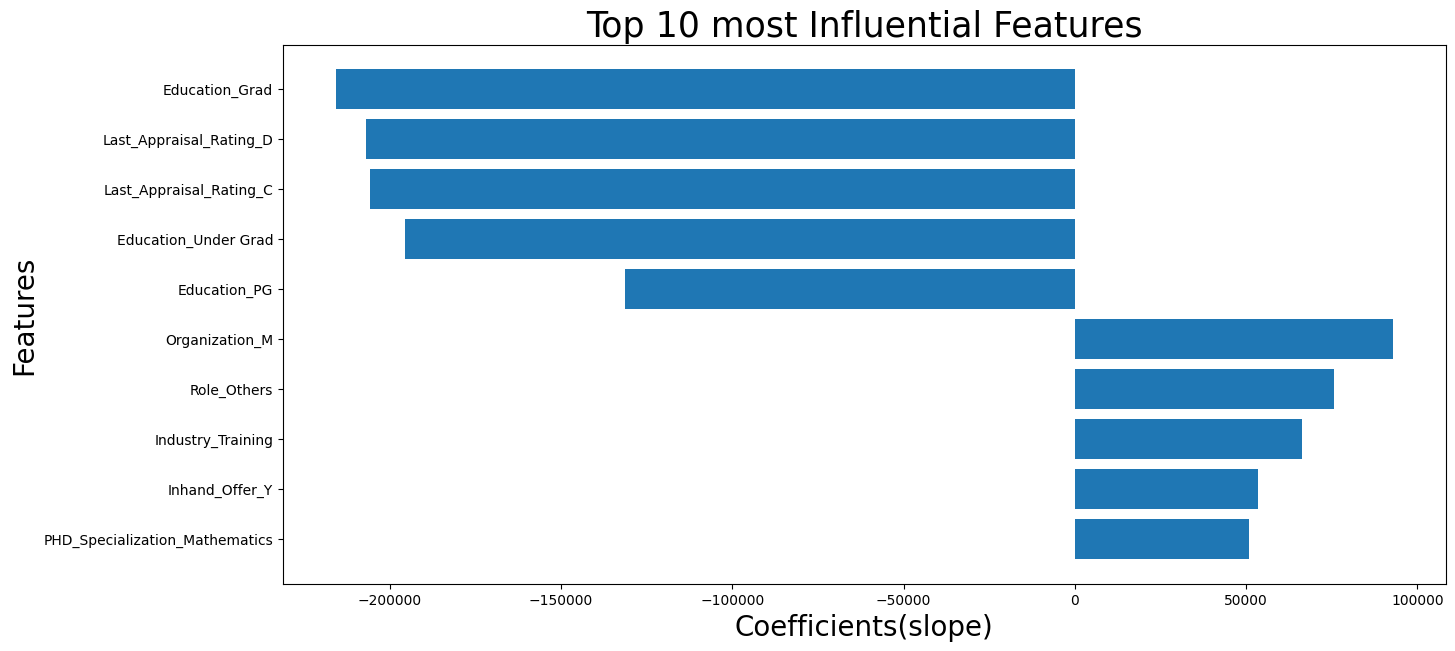

In [33]:
# Visualizing the top 10 most important features

plt.figure(figsize = (15, 7))
plt.barh(top_features['Features'], top_features['Coefficient(slope)'])
plt.title('Top 10 most Influential Features', fontsize = 25)
plt.xlabel('Coefficients(slope)', fontsize = 20)
plt.ylabel('Features', fontsize = 20)
plt.gca().invert_yaxis() # Largest at top
plt.show()

The positive coefficients shows that which feature will leads to increase in ctc. 
The negative coefficients shows that which feature will leads to decrease in ctc

### Evaluate the model

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score: {:.4f}". format(r2_score(Y_test, Y_pred)))
print("Mean Absolute Error: {:.4f}". format(mean_absolute_error(Y_test, Y_pred)))
print("Mean Squared Error: {:.4f}". format(mean_squared_error(Y_test, Y_pred)))
print("Root Mean Squared Error: {:.4f}". format(np.sqrt(mean_squared_error(Y_test, Y_pred))))

R2 Score: 0.9934
Mean Absolute Error: 65157.9364
Mean Squared Error: 8832701030.1567
Root Mean Squared Error: 93982.4506


In [35]:
# Since our R2 score is very high we will compare it with our training set

print("Train R2:", lm.score(X_train, Y_train))
print("Test R2:", lm.score(X_test, Y_test))

Train R2: 0.9935088494582138
Test R2: 0.9933987466124657


Since our training and testing R2 scores are almost similar their is no sign of overfitting

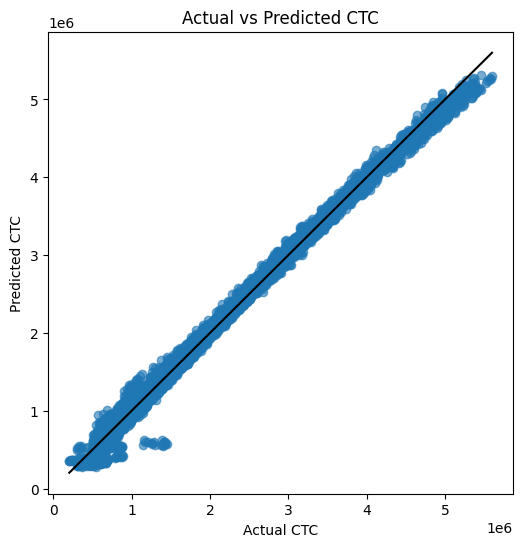

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.xlabel("Actual CTC")
plt.ylabel("Predicted CTC")
plt.title("Actual vs Predicted CTC")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black')
plt.show()


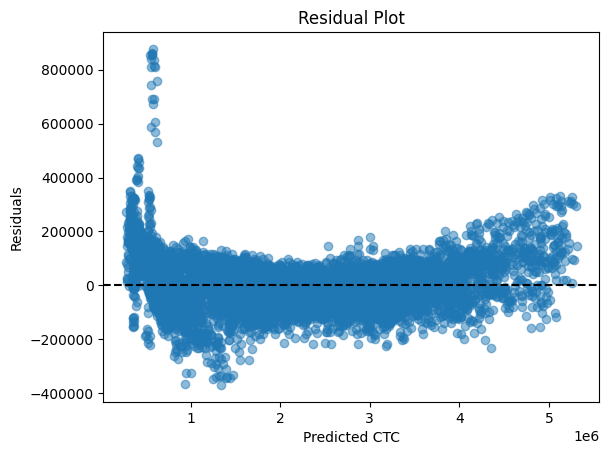

In [37]:
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals, alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


### Lasso Regression

In [38]:
from sklearn.linear_model import Lasso

# Feature Scalling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha = 500)
lasso.fit(X_train_scaled, Y_train)
Y_pred_lasso = lasso.predict(X_test_scaled)

In [39]:
# Checking how many coefficients remain non-zero

non_zero = (lasso.coef_ != 0).sum()
print("No of coefficients that remained non-zero are: {}". format(non_zero))

No of coefficients that remained non-zero are: 85


In [40]:
# Remaining important feature dataframe

lasso_coeff = pd.DataFrame({
    'Features' : X.columns,
    'lasso_coefficients' : lasso.coef_
})

lasso_coeff.head(10)

Features  lasso_coefficients
0                                IDX        0.000000e+00
1                       Applicant_ID        2.917534e+02
2                   Total_Experience       -1.043987e+04
3  Total_Experience_in_field_applied       -0.000000e+00
4         Passing_Year_Of_Graduation       -1.507784e+04
5                 Passing_Year_Of_PG        4.217050e+03
6                Passing_Year_Of_PHD        1.898333e+03
7                        Current_CTC        1.151699e+06
8             No_Of_Companies_worked       -1.141766e+04
9             Number_of_Publications        0.000000e+00

In [41]:
# Evaluating the model after Lasso Regression

print("R2 score: {:.4f}". format(r2_score(Y_test, Y_pred_lasso))) 
print("Mean Absolute Error: {:.4f}". format(mean_absolute_error(Y_test, Y_pred_lasso)))
print("Mean Squared Error: {:.4f}". format(mean_squared_error(Y_test, Y_pred_lasso)))
print("Root Mean Squared Error: {:.4f}". format(np.sqrt(mean_squared_error(Y_test, Y_pred_lasso))))

R2 score: 0.9934
Mean Absolute Error: 64524.5691
Mean Squared Error: 8801735280.5172
Root Mean Squared Error: 93817.5638


### Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model

rf = RandomForestRegressor(n_estimators = 200, max_depth = None, random_state = 42)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)

In [43]:
# Evaluating the model

print("R2 score: {:.4f}". format(r2_score(Y_test, Y_pred_rf)))
print("Mean Absolute Error: {:.4f}".format(mean_absolute_error(Y_test, Y_pred_rf)))
print("Mean Squared Error: {:.4f}".format(mean_squared_error(Y_test, Y_pred_rf)))
print("Root Mean Squared Error: {:.4f}". format(np.sqrt(mean_squared_error(Y_test, Y_pred_rf))))

R2 score: 0.9996
Mean Absolute Error: 12928.2221
Mean Squared Error: 580427123.4033
Root Mean Squared Error: 24092.0552


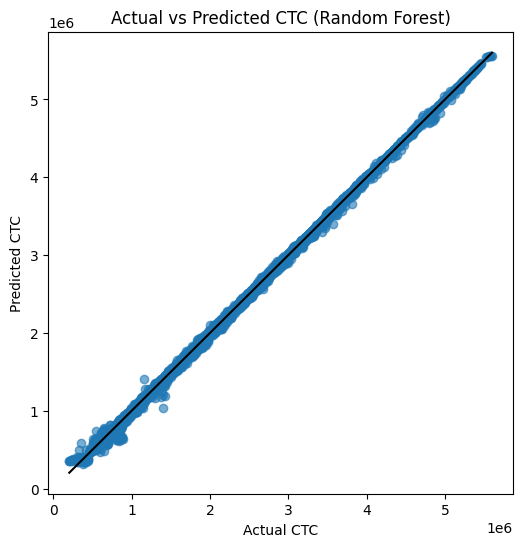

In [44]:
# Visualize the Actual vs Predicted ctc using scatter plot

plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred_rf, alpha=0.6)
plt.xlabel("Actual CTC")
plt.ylabel("Predicted CTC")
plt.title("Actual vs Predicted CTC (Random Forest)")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='black')
plt.show()

### Hyperparameter tuning using GridSearch CV

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200, 300, 400],
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [46]:
# Calling GridSearchCV to find the best hyperparameters for RandomForestRegressor

grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'r2', n_jobs = -1, verbose = 2)
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=200, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='r2', verbose=2)

In [47]:
# Printing the best parameters founded by GridSearch CV

print("Best Parameters: {}". format(grid.best_params_))
print("Best CV Score: {:.4f}". format(grid.best_score_))

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV Score: 0.9574


In [48]:
# Training the RandomForestModel with the best parameters

best_rf = RandomForestRegressor(**grid.best_params_, random_state = 42)
best_rf.fit(X_train, Y_train)
Y_pred_best_rf = best_rf.predict(X_test)

In [49]:
print("R2 score: {:.4f}". format(r2_score(Y_test, Y_pred_best_rf)))
print("Mean Absolute Error: {:.4f}". format(mean_absolute_error(Y_test, Y_pred_best_rf)))
print("Mean Squared Error: {:.4f}". format(mean_squared_error(Y_test, Y_pred_best_rf)))
print("Root Mean Squared Error: {:.4f}". format(np.sqrt(mean_squared_error(Y_test, Y_pred_best_rf))))

R2 score: 0.9608
Mean Absolute Error: 160906.0294
Mean Squared Error: 52502599001.3082
Root Mean Squared Error: 229134.4562


The results after hyperparameter tunning are much worse so we will not use this model

In [50]:
summary_df = pd.DataFrame({
    'Model' : ['Multiple Linear Regression', 'Lasso regression', 'Random Forest ', 'Tunned Random Forest '],
    'R2 Score' : [0.9934, 0.9934, 0.9996, 0.9608],
    'MAE' : [65157.9364, 64524.5691, 12928.2221, 160906.0294],
    'MSE' : [8832701030.1567, 8801735280.5172, 580427123.4033, 52502599001.3082],
    'RMSE' : [94085.1063, 93817.5638, 24092.0552, 229134.4562]
})

# Force RMSE to come after MSE
summary_df = summary_df[['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE']]

summary_df


Model  R2 Score          MAE           MSE  \
0  Multiple Linear Regression    0.9934   65157.9364  8.832701e+09   
1            Lasso regression    0.9934   64524.5691  8.801735e+09   
2              Random Forest     0.9996   12928.2221  5.804271e+08   
3       Tunned Random Forest     0.9608  160906.0294  5.250260e+10   

          RMSE  
0   94085.1063  
1   93817.5638  
2   24092.0552  
3  229134.4562

In [51]:
# Save the final model 

import joblib

joblib.dump(rf, 'predict_ctc_model.pkl')

['predict_ctc_model.pkl']